<a href="https://colab.research.google.com/github/Kovibordy/nero/blob/main/Lab_3(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Установка и импорт библиотек

In [1]:
pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 20.2 MB/s eta 0:00:00


In [27]:
import numpy as np
import skfuzzy as fuz
from skfuzzy import control as ctrl


Определение входных и выходных переменных

Определим входные переменные:

Температура воды в котле (water_temp)
Заданная температура (set_temp)
Скорость изменения температуры (temp_change)

И выходную переменную:

Подача топлива (fuel_supply)

In [47]:
water_temp = ctrl.Antecedent(np.arange(0, 101, 1), 'water_temp')  # Температура воды в котле
set_temp = ctrl.Antecedent(np.arange(0, 101, 1), 'set_temp')  # Заданная температура
temp_change = ctrl.Antecedent(np.arange(-10, 11, 1), 'temp_change')  # Скорость изменения температуры

fuel_supply = ctrl.Consequent(np.arange(0, 101, 1), 'fuel_supply')

Определение функций принадлежности для входных и выходных переменных

1. Температура воды в котле (water_temp):

  Низкая (менее 60°C)
  Умеренная (60-80°C)
  Высокая (более 80°C)
2. Заданная температура (set_temp):

  Низкая (менее 60°C)
  Умеренная (60-80°C)
  Высокая (более 80°C)
3. Скорость изменения температуры (temp_change):

  Убывающая
  Постоянная
  Растущая
4. Подача топлива (fuel_supply):

  Низкая
  Средняя
  Высокая

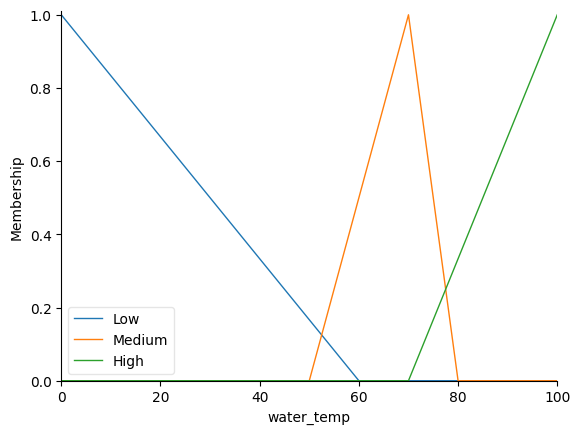

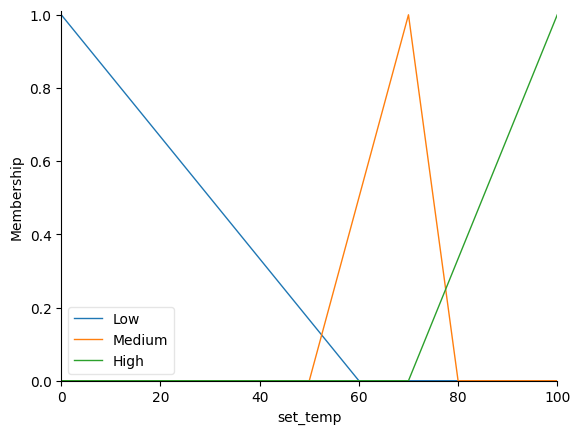

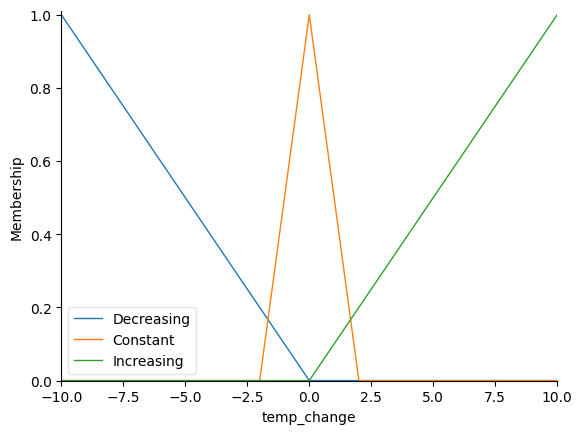

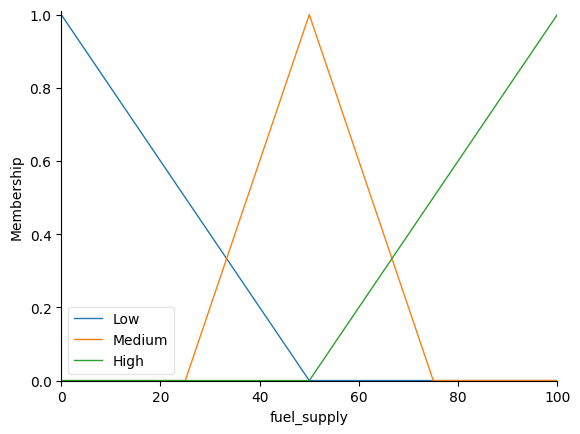

In [39]:
# Функции принадлежности для температуры воды
water_temp['Low'] = fuz.trimf(water_temp.universe, [0, 0, 60])
water_temp['Medium'] = fuz.trimf(water_temp.universe, [50, 70, 80])
water_temp['High'] = fuz.trimf(water_temp.universe, [70, 100, 100])
water_temp.view()
# Функции принадлежности для заданной температуры
set_temp['Low'] = fuz.trimf(set_temp.universe, [0, 0, 60])
set_temp['Medium'] = fuz.trimf(set_temp.universe, [50, 70, 80])
set_temp['High'] = fuz.trimf(set_temp.universe, [70, 100, 100])
set_temp.view()
# Функции принадлежности для скорости изменения температуры
temp_change['Decreasing'] = fuz.trimf(temp_change.universe, [-10, -10, 0])
temp_change['Constant'] = fuz.trimf(temp_change.universe, [-2, 0, 2])
temp_change['Increasing'] = fuz.trimf(temp_change.universe, [0, 10, 10])
temp_change.view()
# Функции принадлежности для подачи топлива
fuel_supply['Low'] = fuz.trimf(fuel_supply.universe, [0, 0, 50])
fuel_supply['Medium'] = fuz.trimf(fuel_supply.universe, [25, 50, 75])
fuel_supply['High'] = fuz.trimf(fuel_supply.universe, [50, 100, 100])
fuel_supply.view()

Определение правил

Теперь составим правила на основе описанных условий:

Если температура воды ниже заданной и скорость изменения температуры растущая, увеличить подачу топлива.
Если температура воды выше заданной, уменьшить подачу топлива.
Если температура воды близка к заданной (в пределах 2°C), поддерживать текущий уровень подачи топлива.
Если температура воды ниже заданной и скорость изменения постоянная, увеличить подачу топлива на средний уровень.
Если температура воды выше заданной и скорость изменения убывающая, уменьшить подачу топлива на низкий уровень.

In [49]:
rule1 = ctrl.Rule(water_temp['Low'] & set_temp['High'] & temp_change['Increasing'], fuel_supply['High'])
rule2 = ctrl.Rule(water_temp['High'] & set_temp['Low'], fuel_supply['Low'])
rule3 = ctrl.Rule(water_temp['Medium'] & set_temp['Medium'], fuel_supply['Medium'])
rule4 = ctrl.Rule(water_temp['Low'] & set_temp['High'] & temp_change['Constant'], fuel_supply['Medium'])
rule5 = ctrl.Rule(water_temp['High'] & set_temp['Low'] & temp_change['Decreasing'], fuel_supply['Low'])


Создание системы управления

In [41]:
fuel_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
fuel_simulation = ctrl.ControlSystemSimulation(fuel_ctrl)


Пример расчета

Подача топлива: 50.00


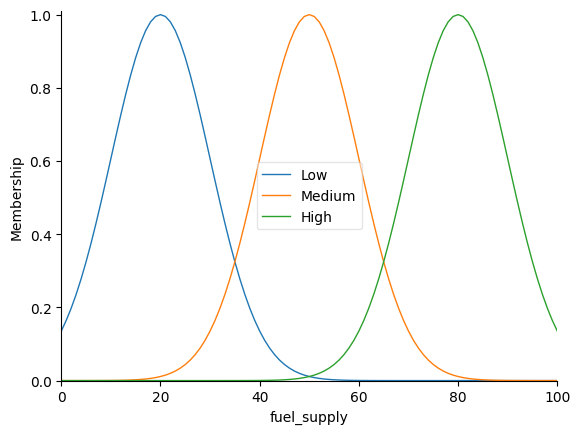

In [50]:
# Пример входных значений
fuel_simulation.input['water_temp'] = 70  # Температура воды
fuel_simulation.input['set_temp'] = 75  # Заданная температура
fuel_simulation.input['temp_change'] = 1  # Скорость изменения

# Выполняем расчет
fuel_simulation.compute()

# Вывод результата
print(f"Подача топлива: {fuel_simulation.output['fuel_supply']:.2f}")
fuel_supply.view(sim=fuel_simulation)


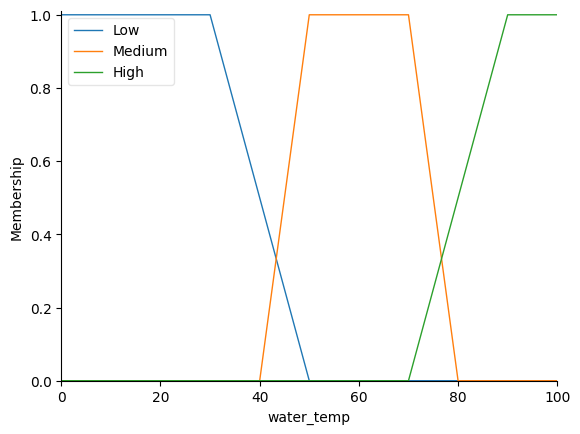

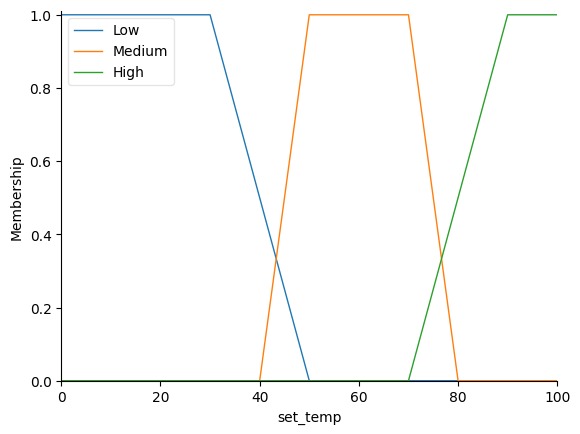

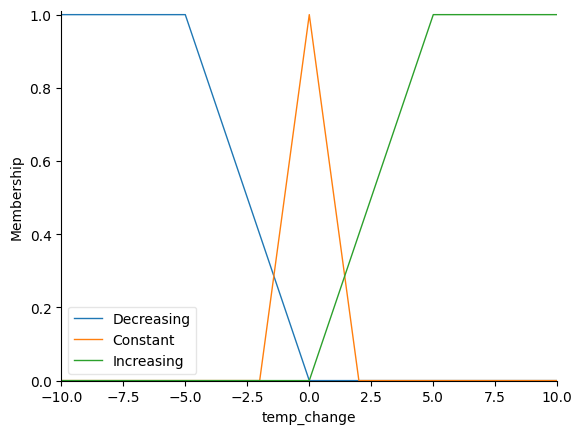

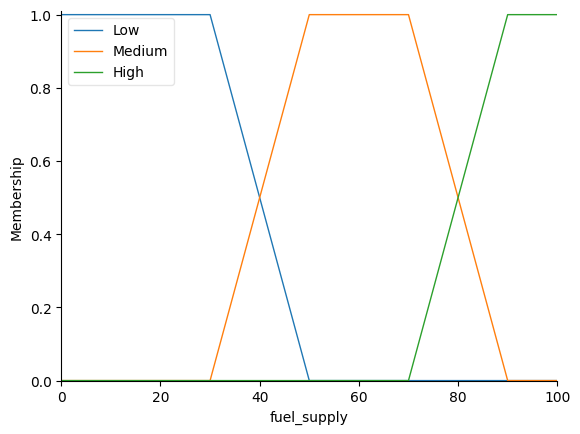

In [44]:
# Трапецеидальная функция для температуры воды
water_temp['Low'] = fuz.trapmf(water_temp.universe, [0, 0, 30, 50])
water_temp['Medium'] = fuz.trapmf(water_temp.universe, [40, 50, 70, 80])
water_temp['High'] = fuz.trapmf(water_temp.universe, [70, 90, 100, 100])
water_temp.view()
# Трапецеидальная функция для заданной температуры
set_temp['Low'] = fuz.trapmf(set_temp.universe, [0, 0, 30, 50])
set_temp['Medium'] = fuz.trapmf(set_temp.universe, [40, 50, 70, 80])
set_temp['High'] = fuz.trapmf(set_temp.universe, [70, 90, 100, 100])
set_temp.view()
# Функции принадлежности для скорости изменения температуры (трапецеидальные)
temp_change['Decreasing'] = fuz.trapmf(temp_change.universe, [-10, -10, -5, 0])
temp_change['Constant'] = fuz.trapmf(temp_change.universe, [-2, 0, 0, 2])
temp_change['Increasing'] = fuz.trapmf(temp_change.universe, [0, 5, 10, 10])
temp_change.view()
# Функции принадлежности для подачи топлива (трапецеидальные)
fuel_supply['Low'] = fuz.trapmf(fuel_supply.universe, [0, 0, 30, 50])
fuel_supply['Medium'] = fuz.trapmf(fuel_supply.universe, [30, 50, 70, 90])
fuel_supply['High'] = fuz.trapmf(fuel_supply.universe, [70, 90, 100, 100])
fuel_supply.view(sim=fuel_simulation)


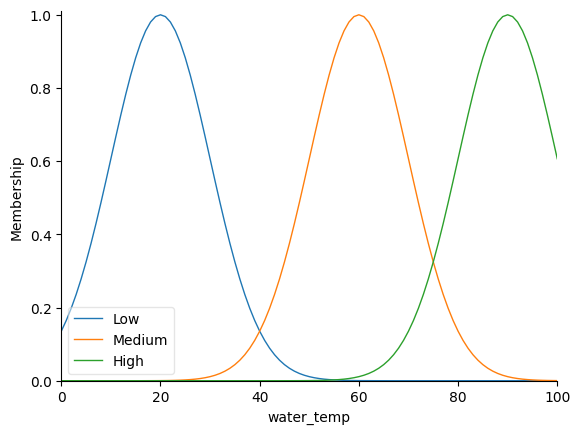

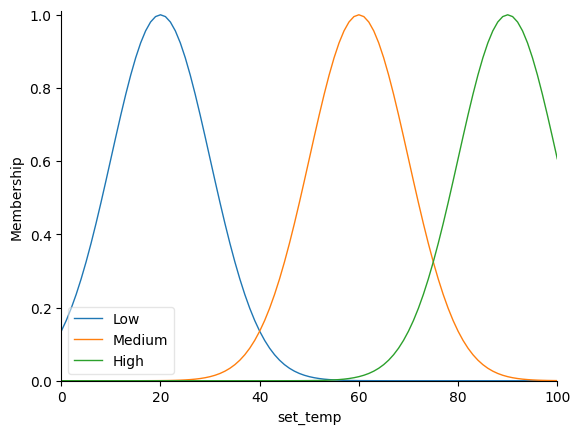

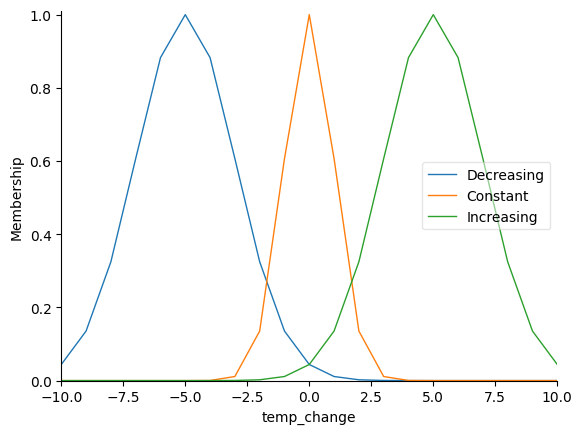

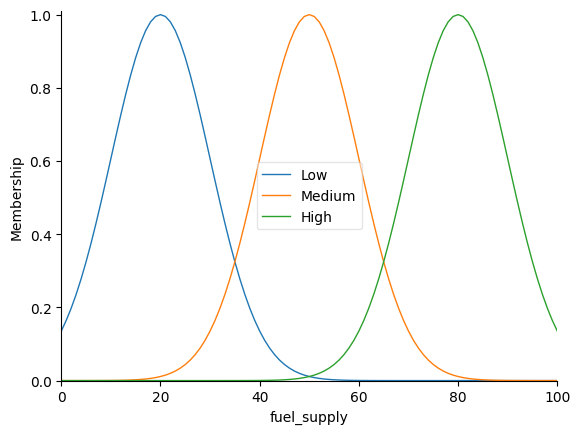

In [48]:
# Функции принадлежности для температуры воды (Гауссовы функции)
water_temp['Low'] = fuz.gaussmf(water_temp.universe, mean=20, sigma=10)
water_temp['Medium'] = fuz.gaussmf(water_temp.universe, mean=60, sigma=10)
water_temp['High'] = fuz.gaussmf(water_temp.universe, mean=90, sigma=10)
water_temp.view()
# Функции принадлежности для заданной температуры (Гауссовы функции)
set_temp['Low'] = fuz.gaussmf(set_temp.universe, mean=20, sigma=10)
set_temp['Medium'] = fuz.gaussmf(set_temp.universe, mean=60, sigma=10)
set_temp['High'] = fuz.gaussmf(set_temp.universe, mean=90, sigma=10)
set_temp.view()
# Функции принадлежности для скорости изменения температуры (Гауссовы функции)
temp_change['Decreasing'] = fuz.gaussmf(temp_change.universe, mean=-5, sigma=2)
temp_change['Constant'] = fuz.gaussmf(temp_change.universe, mean=0, sigma=1)
temp_change['Increasing'] = fuz.gaussmf(temp_change.universe, mean=5, sigma=2)
temp_change.view()
# Функции принадлежности для подачи топлива (Гауссовы функции)
fuel_supply['Low'] = fuz.gaussmf(fuel_supply.universe, mean=20, sigma=10)
fuel_supply['Medium'] = fuz.gaussmf(fuel_supply.universe, mean=50, sigma=10)
fuel_supply['High'] = fuz.gaussmf(fuel_supply.universe, mean=80, sigma=10)
fuel_supply.view()